In [1]:
#import all the necessary packages here

import numpy as np

import csv

import pandas as pd

import warnings

import sklearn

import os

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

import statsmodels.api as sm
from scipy import stats

warnings.simplefilter('ignore')

In [2]:
#Change the directory to the folder where you have all the raw data

os.chdir(r"C:\Users\Shilp\Documents\Shilpa\Shilpa MSBA\Semester 1\Programming for Analytics [CIS 9650]\Final Group Project\Model Datasets")

In [3]:
# Mapping file for State & Abbreviations
us_state_mapping = pd.read_csv("state mapping file.csv", sep=",", error_bad_lines = False)
us_state_mapping.head()

,State,stateabbr
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [4]:
# Import requried datasets
#Meat Consumption
meat_consumption = pd.read_csv("Meat Consumption.csv", sep=",", error_bad_lines = False)
meat_consumption = meat_consumption.iloc[:, :-4]
meat_consumption = pd.merge(meat_consumption, us_state_mapping, on="State", how="left")
meat_consumption.loc[meat_consumption['State'] == 'Hawaii', 'stateabbr'] = 'HI'
meat_consumption = meat_consumption[meat_consumption['stateabbr'].notna()]
meat_consumption


,State,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,stateabbr
0,Alabama,401100.0,433243.0,441436.0,421546.0,387007.0,397274.0,373344.0,513833.0,549845.0,...,433174.0,545107.0,524189.0,697615.0,594901.0,447998.0,526919.0,548185.0,425155.0,AL
1,Alaska,491.0,571.0,954.0,1193.0,993.0,724.0,552.0,848.0,1251.0,...,3037.0,3485.0,1797.0,2368.0,2357.0,2368.0,2393.0,3900.0,3935.0,AK
2,Arizona,635270.0,560332.0,506627.0,535054.0,540449.0,468008.0,461768.0,526870.0,553610.0,...,883403.0,943696.0,880725.0,1058689.0,948266.0,724871.0,846432.0,885222.0,824776.0,AZ
3,Arkansas,364478.0,435532.0,411814.0,312839.0,379127.0,341776.0,330673.0,461507.0,591791.0,...,715348.0,722663.0,654345.0,861348.0,769163.0,553361.0,597046.0,543735.0,509069.0,AR
4,California,1444572.0,1330401.0,1562110.0,1397448.0,1541504.0,1349605.0,1433008.0,1457460.0,1678328.0,...,2669221.0,3227126.0,3073404.0,3770789.0,3233911.0,2579790.0,2672878.0,3216630.0,3090964.0,CA
5,Colorado,2008182.0,1784124.0,1787783.0,1757636.0,1950001.0,1836653.0,1959170.0,1999493.0,2296809.0,...,3239187.0,3797566.0,3875591.0,4142383.0,4235511.0,3270209.0,3640746.0,3600932.0,3809355.0,CO
6,Connecticut,17893.0,13201.0,17009.0,14049.0,14931.0,17660.0,20453.0,14924.0,17610.0,...,13496.0,16193.0,17839.0,22451.0,20431.0,16675.0,14259.0,18052.0,12229.0,CT
7,Delaware,7686.0,9229.0,9775.0,9800.0,10136.0,9786.0,15058.0,16964.0,13040.0,...,7340.0,9042.0,10303.0,8006.0,9256.0,7131.0,9363.0,11312.0,10028.0,DE
8,Florida,400249.0,426855.0,358531.0,395481.0,400221.0,352197.0,296296.0,411433.0,405376.0,...,492615.0,637307.0,649563.0,871483.0,872102.0,548324.0,587763.0,513192.0,477299.0,FL
9,Georgia,403643.0,506564.0,493283.0,483197.0,410583.0,421444.0,419316.0,503401.0,476600.0,...,423552.0,477304.0,448073.0,613273.0,522947.0,406732.0,414789.0,377869.0,337639.0,GA


In [5]:
#CO2 Emission
co2_emission = pd.read_csv("CO2 Emission Annually 1990-2017.csv", sep=",",skiprows=4, error_bad_lines = False)
co2_emission = co2_emission.iloc[:, :-4]
co2_emission = pd.merge(co2_emission, us_state_mapping, on="State", how="left")
co2_emission.loc[co2_emission['State'] == 'Hawaii', 'stateabbr'] = 'HI'
co2_emission = co2_emission[co2_emission['stateabbr'].notna()]
co2_emission.head()

,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,stateabbr
0,Alabama,109.7,114.0,121.0,125.2,123.2,131.0,136.9,133.5,133.3,...,119.9,132.4,129.4,122.8,120.2,122.5,119.4,114.3,108.3,AL
1,Alaska,34.4,35.0,36.6,36.3,36.2,40.7,41.7,41.6,42.9,...,37.7,38.6,38.5,38.0,35.8,35.0,35.9,34.6,34.1,AK
2,Arizona,62.7,63.6,66.6,68.6,71.4,66.3,68.1,71.0,76.2,...,93.1,95.0,93.0,91.1,94.6,92.7,90.4,86.5,85.6,AZ
3,Arkansas,50.8,49.7,51.4,50.4,54.2,57.6,60.2,59.0,60.7,...,61.3,65.6,66.9,65.8,68.0,68.7,58.9,62.0,63.9,AR
4,California,356.6,344.1,349.4,337.9,353.9,342.8,341.4,343.1,354.9,...,365.8,360.1,345.7,350.9,352.5,349.9,357.5,357.3,358.6,CA


In [6]:
#Energy Consumption
energy_consumption = pd.read_excel (r'annual_consumption_state.xlsx')
energy_consumption.head()

,YEAR,STATE,ENERGY_SOURCE,CONSUMPTION_for_ELECTRICITY
0,1990,AK,Coal (Short Tons),404871.0
1,1990,AK,Petroleum (Barrels),961837.0
2,1990,AK,Natural Gas (Mcf),42764948.0
3,1990,AK,Coal (Short Tons),290182.0
4,1990,AK,Petroleum (Barrels),657706.0


In [7]:
#Energy Emissions
petroleum_emission = pd.read_excel(r'Energy Sources Emissions_Combined.xlsx','Petroleum',skiprows=2)
petroleum_emission = petroleum_emission.iloc[:, :-2]
petroleum_emission = pd.merge(petroleum_emission, us_state_mapping, on="State", how="left")
petroleum_emission.loc[petroleum_emission['State'] == 'Hawaii', 'stateabbr'] = 'HI'
petroleum_emission = petroleum_emission[petroleum_emission['stateabbr'].notna()]

natural_gas_emission = pd.read_excel(r'Energy Sources Emissions_Combined.xlsx','Natural gas',skiprows=2)
natural_gas_emission = natural_gas_emission.iloc[:, :-2]
natural_gas_emission = pd.merge(natural_gas_emission, us_state_mapping, on="State", how="left")
natural_gas_emission.loc[natural_gas_emission['State'] == 'Hawaii', 'stateabbr'] = 'HI'
natural_gas_emission = natural_gas_emission[natural_gas_emission['stateabbr'].notna()]

electricity_emission = pd.read_excel(r'Energy Sources Emissions_Combined.xlsx','Electrcitiy',skiprows=2)
electricity_emission = electricity_emission.iloc[:, :-2]
electricity_emission = pd.merge(electricity_emission, us_state_mapping, on="State", how="left")
electricity_emission.loc[electricity_emission['State'] == 'Hawaii', 'stateabbr'] = 'HI'
electricity_emission = electricity_emission[electricity_emission['stateabbr'].notna()]

coal_emission = pd.read_excel(r'Energy Sources Emissions_Combined.xlsx','Coal Emissions',skiprows=2)
coal_emission = coal_emission.iloc[:, :-2]
coal_emission = pd.merge(coal_emission, us_state_mapping, on="State", how="left")
coal_emission.loc[coal_emission['State'] == 'Hawaii', 'stateabbr'] = 'HI'
coal_emission = coal_emission[coal_emission['stateabbr'].notna()]

natural_gas_emission.head()

,State,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,stateabbr
0,Alabama,14.7,14.9,13.4,12.2,12.7,12.0,11.1,11.3,12.9,...,24.7,28.8,32.3,35.9,33.1,34.5,37.2,37.9,36.1,AL
1,Alaska,8.1,6.5,12.6,12.7,13.7,11.3,11.0,13.3,15.3,...,18.2,17.8,18.0,18.4,17.6,17.5,17.7,17.5,18.2,AK
2,Arizona,9.2,10.2,7.5,6.4,6.7,7.3,5.6,6.4,6.8,...,20.0,17.8,15.5,17.9,18.0,16.7,19.3,19.8,17.8,AZ
3,Arkansas,14.5,14.0,12.0,11.2,11.4,10.6,10.7,9.1,11.6,...,13.1,14.5,15.3,15.9,15.2,14.4,15.7,16.7,16.8,AR
4,California,100.1,103.1,93.5,84.8,92.1,102.0,84.3,105.6,98.5,...,126.7,123.2,116.4,130.1,131.4,127.7,126.3,119.1,115.9,CA


In [8]:
#Population
#https://www2.census.gov/programs-surveys/popest/tables/2000-2010/intercensal/state/
population_1 = pd.read_csv("population20002009.csv", sep=",",skiprows=3, error_bad_lines = False)
population_1 = population_1.iloc[5:, :-2]
population_1  = population_1.drop(columns =['Unnamed: 1'])
population_2 = pd.read_csv("population20102020.csv", sep=",",skiprows=3, error_bad_lines = False)
population_2  = population_2.drop(columns =['Census','Estimates Base'])
population_2 = population_2.iloc[5:, :]
population_3 = pd.read_csv("population19901999.csv", sep=",", error_bad_lines = False)
population = segmentation_merge = pd.merge(population_1, population_2, on="Unnamed: 0", how="left")
population = segmentation_merge = pd.merge(population_3, population, on="Unnamed: 0", how="left")
population = population.rename(columns={'Unnamed: 0': 'State'})
population = pd.merge(population, us_state_mapping, on="State", how="left")
population.loc[population['State'] == 'Hawaii', 'stateabbr'] = 'HI'
population = population[population['stateabbr'].notna()]
population.head()

,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,stateabbr
0,Alabama,4048508,4091025,4139269,4193114,4232965,4262731,4290403,4320281,4351037,...,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0,AL
1,Alaska,553120,569273,587073,596993,600624,601345,604918,608846,615205,...,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0,AK
2,Arizona,3679056,3762394,3867333,3993390,4147561,4306908,4432308,4552207,4667277,...,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0,AZ
3,Arkansas,2354343,2370666,2394098,2423743,2450605,2480121,2504858,2524007,2538202,...,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0,AR
4,California,29950111,30414114,30875920,31147208,31317179,31493525,31780829,32217708,32682794,...,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0,CA


In [9]:
# Dependent variable data

us_state_master_v1 = pd.read_csv("data_2010_2019.csv", sep=",", error_bad_lines = False)
us_state_master_v2 = pd.read_csv("data_2000_2009.csv", sep=",", error_bad_lines = False)
us_state_master_v3 = pd.read_csv("data_1990_1999.csv", sep=",", error_bad_lines = False)
us_state_master = us_state_master_v1.append(us_state_master_v2, ignore_index=True)
us_state_master = us_state_master.append(us_state_master_v3, ignore_index=True)
us_state_master

,State,date,metric_name,metric_value
0,AK,20200101,PRCP,59.407895
1,AK,20200101,SNOW,48.717949
2,AK,20200101,TAVG,-161.350319
3,AK,20200101,TMAX,-94.241935
4,AK,20200101,TMIN,-171.959677
...,...,...,...,...
2709010,WY,19991231,PRCP,1.807487
2709011,WY,19991231,SNOW,0.000000
2709012,WY,19991231,TAVG,-41.148936
2709013,WY,19991231,TMAX,32.336898


In [10]:
us_state_master_pivot = pd.pivot_table(us_state_master, values ='metric_value', index =['State','date'], columns =['metric_name']) 
us_state_master_pivot.reset_index(inplace=True)
us_state_master_pivot['date'] = us_state_master_pivot['date'].astype(int)
us_state_master_pivot['Year'] = us_state_master_pivot['date'].astype(str).str[0:4]
us_state_master_yearly = us_state_master_pivot.groupby(['Year','State']).agg(
PRCP_AVG=('PRCP',np.mean),SNOW_AVG=('SNOW',np.mean),TAVG_AVG=('TAVG',np.mean),TMAX_AVG=('TMAX',np.mean),TMIN_AVG=('TMIN',np.mean)).reset_index()

In [11]:
dependent_variable = us_state_master_yearly[['Year','State','TMAX_AVG']]

In [12]:
## Tranforming wide format files to long format ##
## Population 
population_final = population.melt(id_vars=['stateabbr'],value_vars=['1990','1991','1992','1993','1994','1995','1996',
                                                             '1997','1998','1999','2000','2001','2002','2003',
                                                            '2004','2005','2006','2007','2008','2009','2010',
                                                            '2011','2012','2013','2014','2015','2016','2017','2018','2019'])
population_final.columns = ['State','Year','Population']

## Meat Consumption
meat_consumption_final = meat_consumption.melt(id_vars=['stateabbr'],value_vars=['1990','1991','1992','1993','1994','1995','1996',
                                                             '1997','1998','1999','2000','2001','2002','2003',
                                                            '2004','2005','2006','2007','2008','2009','2010',
                                                            '2011','2012','2013','2014','2015','2016','2017','2018','2019'])
meat_consumption_final.columns = ['State','Year','meat_consumption']

## CO2 emission
co2_emission_final = co2_emission.melt(id_vars=['stateabbr'],value_vars=['1990','1991','1992','1993','1994','1995','1996',
                                                             '1997','1998','1999','2000','2001','2002','2003',
                                                            '2004','2005','2006','2007','2008','2009','2010',
                                                            '2011','2012','2013','2014','2015','2016','2017'])
co2_emission_final.columns = ['State','Year','co2_emission']

# Energy consumption
energy_consumption_final = pd.pivot_table(energy_consumption, values ='CONSUMPTION_for_ELECTRICITY', index =['YEAR','STATE'], columns =['ENERGY_SOURCE'])
energy_consumption_final  = energy_consumption_final.drop(columns =['Geothermal (Billion Btu)','Other Gases (Billion Btu)','Other Gases (Billion BTU)'])
energy_consumption_final.reset_index(inplace=True)
energy_consumption_final.columns = ['Year','State','coal_consumption','natural_gas_consumption','petroleum_consumption']
energy_consumption_final['Year'] = energy_consumption_final['Year'].astype(str) 
energy_consumption_final['State'] = energy_consumption_final['State'].astype(str) 


# Energy Emission
petroleum_emission_final = petroleum_emission.melt(id_vars=['stateabbr'],value_vars=[1990,1991,1992,1993,1994,1995,1996,
                                                             1997,1998,1999,2000,2001,2002,2003,
                                                            2004,2005,2006,2007,2008,2009,2010,
                                                            2011,2012,2013,2014,2015,2016,2017])

petroleum_emission_final.columns = ['State','Year','petroleum_emission']
petroleum_emission_final['Year'] = petroleum_emission_final['Year'].astype(str)                                                   

                                                   
natural_gas_emission_final = natural_gas_emission.melt(id_vars=['stateabbr'],value_vars=[1990,1991,1992,1993,1994,1995,1996,
                                                             1997,1998,1999,2000,2001,2002,2003,
                                                            2004,2005,2006,2007,2008,2009,2010,
                                                            2011,2012,2013,2014,2015,2016,2017])
natural_gas_emission_final.columns = ['State','Year','natural_gas_emission']
natural_gas_emission_final['Year'] = natural_gas_emission_final['Year'].astype(str)

electricity_emission_final = electricity_emission.melt(id_vars=['stateabbr'],value_vars=[1990,1991,1992,1993,1994,1995,1996,
                                                             1997,1998,1999,2000,2001,2002,2003,
                                                            2004,2005,2006,2007,2008,2009,2010,
                                                            2011,2012,2013,2014,2015,2016,2017])
electricity_emission_final.columns = ['State','Year','electricity_emission']
electricity_emission_final['Year'] = electricity_emission_final['Year'].astype(str)

coal_emission_final = coal_emission.melt(id_vars=['stateabbr'],value_vars=[1990,1991,1992,1993,1994,1995,1996,
                                                             1997,1998,1999,2000,2001,2002,2003,
                                                            2004,2005,2006,2007,2008,2009,2010,
                                                            2011,2012,2013,2014,2015,2016,2017])
coal_emission_final.columns = ['State','Year','coal_emission']
coal_emission_final['Year'] = coal_emission_final['Year'].astype(str)


In [13]:
independent_variables = pd.merge(population_final, meat_consumption_final, on=['State','Year'], how="left")
independent_variables = pd.merge(independent_variables, co2_emission_final, on=['State','Year'], how="left")
independent_variables = pd.merge(independent_variables, petroleum_emission_final, on=['State','Year'], how="left")
independent_variables = pd.merge(independent_variables, natural_gas_emission_final, on=['State','Year'], how="left")
independent_variables = pd.merge(independent_variables, electricity_emission_final, on=['State','Year'], how="left")
independent_variables = pd.merge(independent_variables, coal_emission_final, on=['State','Year'], how="left")
independent_variables = pd.merge(independent_variables, energy_consumption_final, on=['State','Year'], how="left")


In [14]:
independent_variables

,State,Year,Population,meat_consumption,co2_emission,petroleum_emission,natural_gas_emission,electricity_emission,coal_emission,coal_consumption,natural_gas_consumption,petroleum_consumption
0,AL,1990,4048508.0,650869.0,109.7,31.9,13.3,51.4,64.8,1.112118e+07,5.200895e+06,1.665833e+05
1,AK,1990,553120.0,1137.0,34.4,16.0,17.3,2.6,1.2,2.699140e+05,2.850997e+07,4.809185e+05
2,AZ,1990,3679056.0,529502.0,62.7,23.3,6.9,32.8,32.7,1.059928e+07,1.247120e+07,1.291100e+05
3,AR,1990,2354343.0,689578.0,50.8,18.3,12.4,21.5,20.2,7.909597e+06,2.392318e+07,8.454900e+04
4,CA,1990,29950111.0,1820130.0,356.6,238.4,111.3,40.4,8.0,6.255665e+05,2.225952e+08,3.096321e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,VA,2019,8535519.0,405959.0,NaN,NaN,NaN,NaN,NaN,5.935177e+05,1.383117e+08,1.810713e+05
1496,WA,2019,7614893.0,857654.0,NaN,NaN,NaN,NaN,NaN,3.207177e+06,4.355798e+07,1.259480e+04
1497,WV,2019,1792147.0,161500.0,NaN,NaN,NaN,NaN,NaN,1.188013e+07,7.582084e+06,1.536333e+05
1498,WI,2019,5822434.0,1812338.0,NaN,NaN,NaN,NaN,NaN,7.404656e+06,4.936901e+07,1.034787e+05


In [15]:
#Creating Master dataset to run regression model
master_dataset = pd.merge(dependent_variable, independent_variables, on=['State','Year'], how="left")

In [16]:
# Remove years that do not have data for the independent variables
master_dataset = master_dataset[~master_dataset.Year.isin(['2018','2019')]
master_dataset = master_dataset[~master_dataset.State.isin(['DC'])]

In [17]:
#To identify the number of missing values in the master dataset
master_dataset.isna().sum()

Year                        0
State                       0
TMAX_AVG                    0
Population                  0
meat_consumption            0
co2_emission                0
petroleum_emission          0
natural_gas_emission        0
electricity_emission        0
coal_emission               0
coal_consumption           43
natural_gas_consumption    23
petroleum_consumption       0
dtype: int64

In [18]:
master_dataset['coal_consumption'] = master_dataset['coal_consumption'].fillna(0)
master_dataset['natural_gas_consumption'] = master_dataset['natural_gas_consumption'].fillna(0)

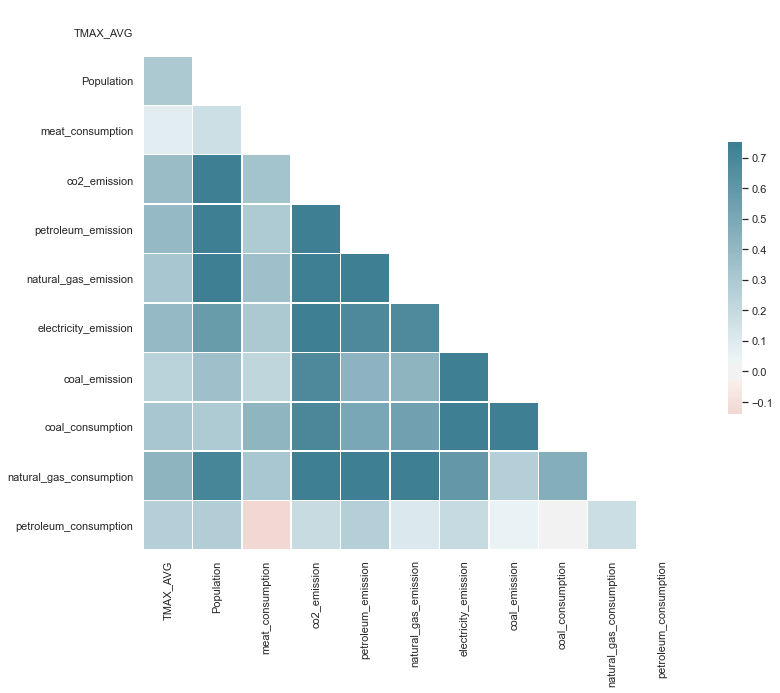

In [19]:
# Correlation Matrix


from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")



# Compute the correlation matrix
corr = master_dataset.corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [43]:
# Mapping file for State & Abbreviations
cluster_state_mapping = pd.read_csv("state_cluster_mapping.csv", sep=",", error_bad_lines = False)
cluster_state_mapping.head()

,State,Cluster
0,AK,1
1,AL,3
2,AR,3
3,AZ,2
4,CA,1


In [44]:
master_dataset = pd.merge(master_dataset, cluster_state_mapping, on="State", how="left")

In [1]:
master_dataset.sort_values(['Cluster','State','Year'],ascending=[True,True,True])

NameError: name 'master_dataset' is not defined

In [46]:
# Basic Linear Regression Model to give some idea on the obviously important independent variables.

## Train regression model
## Step 1 : add constant to the equation - array of ones
X_array = sm.add_constant(master_dataset[['Population','co2_emission',
                                          'natural_gas_emission','coal_emission','coal_consumption','natural_gas_consumption','petroleum_consumption']])
Y = master_dataset['TMAX_AVG']
## Step 2 : build model

est = sm.OLS(Y,X_array)

## Step 3 : fit
est2 = est.fit()
print(est2.summary())
# Durbin Watson metrics has to be in between 1.4 and 2.6l



                            OLS Regression Results                            
Dep. Variable:               TMAX_AVG   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     98.59
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          4.78e-117
Time:                        02:17:26   Log-Likelihood:                -7140.8
No. Observations:                1400   AIC:                         1.430e+04
Df Residuals:                    1392   BIC:                         1.434e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [47]:
## Log transforming all the variables 

# First make a copy so that actual dataset is not altered
master_dataset_log = master_dataset.copy()

# Taking log transform
for c in [c for c in master_dataset_log.columns if np.issubdtype(master_dataset_log[c].dtype , np.number)]:
    master_dataset_log[c] = np.log(master_dataset_log[c]+1)
    
master_dataset_log = master_dataset_log.add_suffix('_log')

In [48]:
master_dataset_log = pd.merge(master_dataset_log, cluster_state_mapping,left_on='State_log',right_on='State', how="left")
master_dataset_cluster0 = master_dataset_log[master_dataset_log.Cluster == 0]
master_dataset_cluster1 = master_dataset_log[master_dataset_log.Cluster == 1]
master_dataset_cluster2 = master_dataset_log[master_dataset_log.Cluster == 2]
master_dataset_cluster3 = master_dataset_log[master_dataset_log.Cluster == 3]


In [49]:
master_dataset_cluster0

,Year_log,State_log,TMAX_AVG_log,Population_log,meat_consumption_log,co2_emission_log,petroleum_emission_log,natural_gas_emission_log,electricity_emission_log,coal_emission_log,coal_consumption_log,natural_gas_consumption_log,petroleum_consumption_log,Cluster_x_log,Cluster_y_log,State,Cluster
6,1990,CT,5.112351,15.006111,9.712509,3.728100,3.475067,1.916923,2.517696,1.547563,13.785054,15.315239,15.574448,0.0,0.0,CT,0
7,1990,DE,5.319174,13.413635,9.691222,2.867899,2.292535,1.131402,2.151762,1.902108,14.192258,15.789886,14.860826,0.0,0.0,DE,0
18,1990,MA,5.070645,15.610376,9.491149,4.433195,4.079231,2.740840,3.288402,2.468100,14.566498,16.861557,15.930778,0.0,0.0,MA,0
19,1990,MD,5.291633,15.383591,11.626816,4.262680,3.540959,2.360854,3.314186,3.339322,15.324826,16.096890,14.879001,0.0,0.0,MD,0
20,1990,ME,4.811471,14.023579,10.033594,2.995732,2.933857,0.182322,1.131402,0.693147,11.561592,13.180805,14.373712,0.0,0.0,ME,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,2017,NH,4.916045,14.114717,9.026778,2.667228,2.424803,1.335001,1.029619,0.262364,11.805946,16.165142,11.086395,0.0,0.0,NH,0
1380,2017,NJ,5.176362,15.999934,8.853951,4.624973,4.130355,3.686376,2.873565,0.955511,12.455057,18.287757,10.897116,0.0,0.0,NJ,0
1383,2017,NY,4.973897,16.790508,12.728087,5.060694,4.489759,4.231204,3.135494,1.064711,11.732220,18.630970,12.735049,0.0,0.0,NY,0
1388,2017,RI,5.094771,13.869690,6.788972,2.397895,1.791759,1.791759,1.335001,0.000000,0.000000,17.082601,10.383918,0.0,0.0,RI,0


In [50]:
# Log -Log Regression Model 

## Train regression model
## Step 1 : add constant to the equation - array of ones
X_array = sm.add_constant(master_dataset_log[['Population_log','co2_emission_log','petroleum_emission_log',
                                          'natural_gas_emission_log','coal_emission_log','meat_consumption_log','natural_gas_consumption_log','coal_consumption_log','electricity_emission_log','petroleum_consumption_log']])
Y = master_dataset_log['TMAX_AVG_log']
## Step 2 : build model
### Remove first row as it looks a bit off

est = sm.OLS(Y,X_array)

## Step 3 : fit
est2 = est.fit()
print(est2.summary())
# Durbin Watson metrics haas to be in between 1.4 and 2.6l

                            OLS Regression Results                            
Dep. Variable:           TMAX_AVG_log   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     155.3
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          3.20e-218
Time:                        02:17:29   Log-Likelihood:                 160.67
No. Observations:                1400   AIC:                            -299.3
Df Residuals:                    1389   BIC:                            -241.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [51]:
def GroupRegress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    print(result.summary())


master_dataset_log.groupby('Cluster').apply(GroupRegress, 'TMAX_AVG_log', ['Population_log','co2_emission_log','petroleum_emission_log',
                                          'natural_gas_emission_log','coal_emission_log','meat_consumption_log','natural_gas_consumption_log','coal_consumption_log','electricity_emission_log','petroleum_consumption_log'])

                            OLS Regression Results                            
Dep. Variable:           TMAX_AVG_log   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     47.84
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           5.11e-54
Time:                        02:17:29   Log-Likelihood:                 256.82
No. Observations:                 280   AIC:                            -491.6
Df Residuals:                     269   BIC:                            -451.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Population_log    

""


In [57]:
# Cluster 0 Log -Log Regression Model 

## Train regression model
## Step 1 : add constant to the equation - array of ones
X_array0 = sm.add_constant(master_dataset_cluster0[['Population_log','co2_emission_log','petroleum_emission_log',
                                          'meat_consumption_log','natural_gas_consumption_log','petroleum_consumption_log']])
Y0 = master_dataset_cluster0['TMAX_AVG_log']
## Step 2 : build model
### Remove first row as it looks a bit off

est = sm.OLS(Y0,X_array0)

## Step 3 : fit
est0 = est.fit()
print(est0.summary())
# Durbin Watson metrics haas to be in between 1.4 and 2.6l

                            OLS Regression Results                            
Dep. Variable:           TMAX_AVG_log   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     78.02
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           2.41e-56
Time:                        02:18:31   Log-Likelihood:                 253.57
No. Observations:                 280   AIC:                            -493.1
Df Residuals:                     273   BIC:                            -467.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [59]:
# Cluster 1 Log -Log Regression Model 

## Train regression model
## Step 1 : add constant to the equation - array of ones
X_array1 = sm.add_constant(master_dataset_cluster1[['Population_log','co2_emission_log','petroleum_emission_log',
                                          'natural_gas_emission_log','coal_emission_log','meat_consumption_log','natural_gas_consumption_log','coal_consumption_log','electricity_emission_log','petroleum_consumption_log']])
Y1 = master_dataset_cluster1['TMAX_AVG_log']
## Step 2 : build model
### Remove first row as it looks a bit off

est = sm.OLS(Y1,X_array1)

## Step 3 : fit
est1 = est.fit()
print(est1.summary())
# Durbin Watson metrics haas to be in between 1.4 and 2.6l

                            OLS Regression Results                            
Dep. Variable:           TMAX_AVG_log   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     179.9
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          1.32e-137
Time:                        02:19:29   Log-Likelihood:                 195.65
No. Observations:                 392   AIC:                            -369.3
Df Residuals:                     381   BIC:                            -325.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [67]:
# Cluster 2 Log -Log Regression Model 

## Train regression model
## Step 1 : add constant to the equation - array of ones
X_array2 = sm.add_constant(master_dataset_cluster2[['Population_log','co2_emission_log',
                                          'natural_gas_emission_log','coal_emission_log','meat_consumption_log','natural_gas_consumption_log','electricity_emission_log']])
Y2 = master_dataset_cluster2['TMAX_AVG_log']
## Step 2 : build model
### Remove first row as it looks a bit off

est = sm.OLS(Y2,X_array2)

## Step 3 : fit
est2 = est.fit()
print(est2.summary())
# Durbin Watson metrics haas to be in between 1.4 and 2.6l

                            OLS Regression Results                            
Dep. Variable:           TMAX_AVG_log   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     363.1
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.08e-55
Time:                        02:21:31   Log-Likelihood:                 159.59
No. Observations:                  84   AIC:                            -303.2
Df Residuals:                      76   BIC:                            -283.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [71]:
# Cluster 3 Log -Log Regression Model 

## Train regression model
## Step 1 : add constant to the equation - array of ones
X_array3 = sm.add_constant(master_dataset_cluster3[['Population_log','petroleum_emission_log',
                                          'natural_gas_emission_log','coal_emission_log','meat_consumption_log','natural_gas_consumption_log','coal_consumption_log','electricity_emission_log']])
Y3 = master_dataset_cluster3['TMAX_AVG_log']
## Step 2 : build model
### Remove first row as it looks a bit off

est = sm.OLS(Y3,X_array3)

## Step 3 : fit
est3 = est.fit()
print(est3.summary())
# Durbin Watson metrics haas to be in between 1.4 and 2.6l

                            OLS Regression Results                            
Dep. Variable:           TMAX_AVG_log   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     156.9
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          6.59e-145
Time:                        02:22:41   Log-Likelihood:                 463.45
No. Observations:                 644   AIC:                            -908.9
Df Residuals:                     635   BIC:                            -868.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [357]:
est0.params

const                          7.742421
coal_emission_log              0.077509
natural_gas_consumption_log    0.069236
meat_consumption_log          -0.282108
dtype: float64

In [358]:
master_dataset_log_cluster0.mean()

Year_log                                inf
TMAX_AVG_log                   5.238478e+00
Population_log                 1.507960e+01
meat_consumption_log           1.400113e+01
co2_emission_log               4.297324e+00
petroleum_emission_log         3.223724e+00
natural_gas_emission_log       2.779398e+00
electricity_emission_log       3.617055e+00
coal_emission_log              3.510869e+00
coal_consumption_log           1.639585e+01
natural_gas_consumption_log    1.695321e+01
petroleum_consumption_log      1.056829e+01
Cluster_x_log                  0.000000e+00
Cluster_y_log                  0.000000e+00
Cluster                        0.000000e+00
Year                                    inf
TMAX_AVG                       1.915228e+02
Population                     3.947876e+06
meat_consumption               1.545665e+06
co2_emission                   7.453095e+01
petroleum_emission             2.549762e+01
natural_gas_emission           1.612262e+01
electricity_emission           3